# Trained ResNet-50 classification on cervix images

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import numpy as np

In [3]:
# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
from resnet_keras122 import get_resnet_original

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5103)


In [6]:
from training_utils import get_trainval_id_type_lists

print("\n {} - Get train/val lists ...".format(datetime.now()))
train_id_type_list, val_id_type_list = get_trainval_id_type_lists()

cervix_train_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in train_id_type_list if id_type[0] != '1339']
cervix_val_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in val_id_type_list if id_type[0] != '1339']


 2017-04-08 00:15:17.327765 - Get train/val lists ...
Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


In [7]:
print("\n {} - Get ResNet-50 model ...".format(datetime.now()))
#resnet = get_resnet_original(opt='nadam')
resnet = get_resnet50(opt='adadelta')


 2017-04-08 00:15:17.348761 - Get ResNet-50 model ...


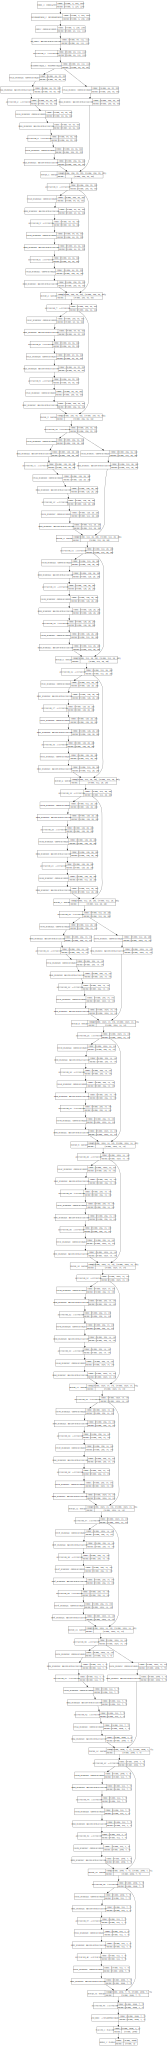

In [8]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

graph = model_to_dot(resnet, True, True)
SVG(graph.create(prog='dot', format='svg'))

In [9]:
# from training_utils import exp_decay

# lr_1 = 1.0; a_1 = 0.95
# lr_2 = 1e-1; a_2 = 0.985

# epochs = np.arange(0, 50)
# lrs_1 = exp_decay(epochs, lr=lr_1, a=a_1)
# lrs_2 = exp_decay(epochs, lr=lr_2, a=a_2)
# plt_st(12, 5)
# plt.plot(epochs, lrs_1, label="lr=%f, a=%f" % (lr_1, a_1))
# plt.plot(epochs, lrs_2, label="lr=%f, a=%f" % (lr_2, a_2))
# plt.legend()

In [8]:
save_prefix='resnet_4_dense_cervix_nadam_seed=2017'

In [10]:
from glob import glob

weights_files = glob("weights/%s*.h5" % save_prefix)
best_val_loss = 1e5
best_weights_filename = ""
for f in weights_files:
    index = os.path.basename(f).index('-')
    loss = float(os.path.basename(f)[index+1:-4])
    if best_val_loss > loss:
        best_val_loss = loss
        best_weights_filename = f
print("Best val loss weights: ", best_weights_filename)


if len(best_weights_filename) > 0:
    # load weights to the model
    print("Load found weights: ", best_weights_filename)
    resnet.load_weights(best_weights_filename)

('Best val loss weights: ', '')


In [13]:
from xy_providers import DataCache
cache = DataCache(1500)

In [14]:
if True:
    from training_utils import classification_train as train
    
    nb_epochs = 50
    batch_size = 4
    
    # lrate_decay_f = lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(resnet, 
              cervix_train_id_type_list, 
              cervix_val_id_type_list, 
              nb_epochs=nb_epochs,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              save_prefix=save_prefix)


 2017-04-08 00:14:09.691061 - Start training ...
('-- Training parameters: ', 4, 50, 2048, 1024)


TypeError: super(type, obj): obj must be an instance or subtype of type

In [43]:
from training_utils import classification_validate as validate
    
print("\n {} - Start validation ...".format(datetime.now()))
validate(resnet, cervix_val_id_type_list, batch_size=batch_size, xy_provider_cache=cache)


 2017-03-20 13:42:47.529796 - Start validation ...
('--', 10, 'batch loss : ', 1.7966474)
('--', 20, 'batch loss : ', 1.3152173)
('--', 30, 'batch loss : ', 1.613647)
('--', 40, 'batch loss : ', 1.4569806)
('--', 50, 'batch loss : ', 2.0192065)
('--', 60, 'batch loss : ', 1.6919658)
('--', 70, 'batch loss : ', 1.3893174)
('--', 80, 'batch loss : ', 1.8404121)
('--', 90, 'batch loss : ', 1.9715917)
('--', 100, 'batch loss : ', 1.0972403)
('--', 110, 'batch loss : ', 1.7654177)
('--', 120, 'batch loss : ', 1.8749675)
('--', 130, 'batch loss : ', 1.4216545)
('--', 140, 'batch loss : ', 1.9844157)
('--', 150, 'batch loss : ', 1.3714226)
('--', 160, 'batch loss : ', 1.6437589)
('--', 170, 'batch loss : ', 1.7335141)
('--', 180, 'batch loss : ', 1.3536484)
('--', 190, 'batch loss : ', 1.4434325)
('--', 200, 'batch loss : ', 1.3440229)
('--', 210, 'batch loss : ', 1.5808131)
('--', 220, 'batch loss : ', 1.3319602)
('--', 230, 'batch loss : ', 2.203378)
('--', 240, 'batch loss : ', 1.1053935)

In [44]:
print("\n {} - Start predictions and write submission ...".format(datetime.datetime.now()))
predict(resnet, info='resnet50_4d_no_additional', batch_size=8)


 2017-03-20 13:46:08.072525 - Start predictions and write submission ...
('--', 0)
('--', 8)
('--', 16)
('--', 24)
('--', 32)
('--', 40)
('--', 48)
('--', 56)
('--', 64)
('--', 72)
('--', 80)
('--', 88)
('--', 96)
('--', 104)
('--', 112)
('--', 120)
('--', 128)
('--', 136)
('--', 144)
('--', 152)
('--', 160)
('--', 168)
('--', 176)
('--', 184)
('--', 192)
('--', 200)
('--', 208)
('--', 216)
('--', 224)
('--', 232)
('--', 240)
('--', 248)
('--', 256)
('--', 264)
('--', 272)
('--', 280)
('--', 288)
('--', 296)
('--', 304)
('--', 312)
('--', 320)
('--', 328)
('--', 336)
('--', 344)
('--', 352)
('--', 360)
('--', 368)
('--', 376)
('--', 384)
('--', 392)
('--', 400)
('--', 408)
('--', 416)
('--', 424)
('--', 432)
('--', 440)
('--', 448)
('--', 456)
('--', 464)
('--', 472)
('--', 480)
('--', 488)
('--', 496)
('--', 504)
     513
